/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_58730/3098315297.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


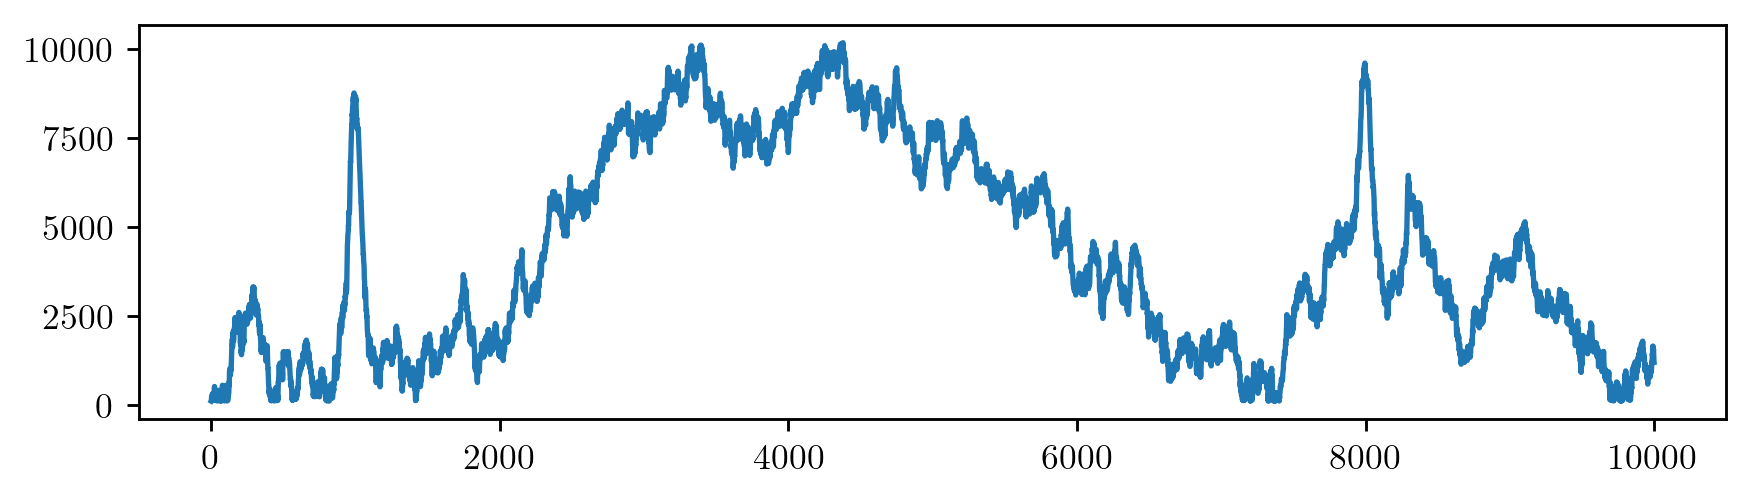

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs

from stable_baselines3 import A2C, PPO
from matplotlib import cm

importlib.reload(vecenvs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

np.random.seed(0)

setup_name = 'test'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 10000

supply_nodes = np.array([7, 8])
supply_amounts = 100 * np.random.poisson(10, size=(2, max_time))
supply_prices = 1 * np.ones(shape=(2, max_time))

demand_nodes = np.array([0])
demand_prices = 30.0 * np.ones(shape=(1, max_time))

demand_means = 100 * np.sin(np.pi * np.arange(max_time)/ 1000)**2 + 100
demand_means = np.zeros(max_time)
demand_means[0] = 0

for t in range(max_time-1):
    demand_means[t+1] = demand_means[t] + np.random.normal(0, 100)

def normal_spike(x, mu, sigsq):
    return np.exp(-(x-mu)**2 / sigsq)

demand_means = np.abs(demand_means) + 100
demand_means += 8000 * normal_spike(np.arange(max_time), 1000, 4000)
demand_means += 6000 * normal_spike(np.arange(max_time), 8000, 4000)
demand_amounts = demand_means.reshape(1, -1)

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

fig, ax = plt.subplots()
fig.set_size_inches(8, 2)

ax.plot(demand_means)

fig.show()
    

In [133]:
num_envs = 1

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs, update_interval=100)
model = PPO('MlpPolicy', env, verbose=0, n_steps=10, learning_rate=1e-4)
num_episodes = 1

rewards = np.zeros(shape=(num_episodes, num_envs, env.max_time, env.num_nodes))

for episode in range(num_episodes):
    env.reset()
    model.learn(total_timesteps=max_time*num_envs)
    rewards[episode] = env.batch_node_profit_history
    print(f'Done episode {episode+1}/{num_episodes}')

/Users/max/Library/Python/3.9/lib/python/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 10
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10 and n_envs=1)
  warnings.warn(
/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:201: RuntimeWarning: invalid value encountered in double_scalars
  mean_tot_reward = np.sum(self.batch_node_profit_history) / (self.num_envs * self.time)


100: -1800.00
200: -1669.51
300: -10875.48
400: 73485.06
500: 107.62
600: 17350.51
700: -8699.55
800: -1482.13
900: -8497.15
1000: 47593.73
1100: -11399.04
1200: 45043.43
1300: 19878.51
1400: -13486.23
1500: 4933.57
1600: 31966.74
1700: 30842.69
1800: 49781.35
1900: 41410.15
2000: 25558.71
2100: 30708.57
2200: -9600.87
2300: 71318.49
2400: -15082.69
2500: 150134.73
2600: -10124.07
2700: 154930.80
2800: -6480.05
2900: 9437.65
3000: -12737.86
3100: 217717.42
3200: -9064.21
3300: 20947.72
3400: 13103.80
3500: 186044.64
3600: -7855.10
3700: 216807.57
3800: 3240.90
3900: -7536.10
4000: 33151.60
4100: -12436.10
4200: -8868.40
4300: 38398.40
4400: 95466.80
4500: -8686.50
4600: -10909.50
4700: 260983.64
4800: -7945.10
4900: -6767.10
5000: -5069.10
5100: 118225.00
5200: -6493.10
5300: -10634.60
5400: -11935.80
5500: 56721.38
5600: 157660.94
5700: 18937.15
5800: 132162.79
5900: -4446.80
6000: 139484.89
6100: 88770.14
6200: 116977.26
6300: 90892.05
6400: -9945.70
6500: 13418.82
6600: 33516.91
670

/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_58730/3178817733.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


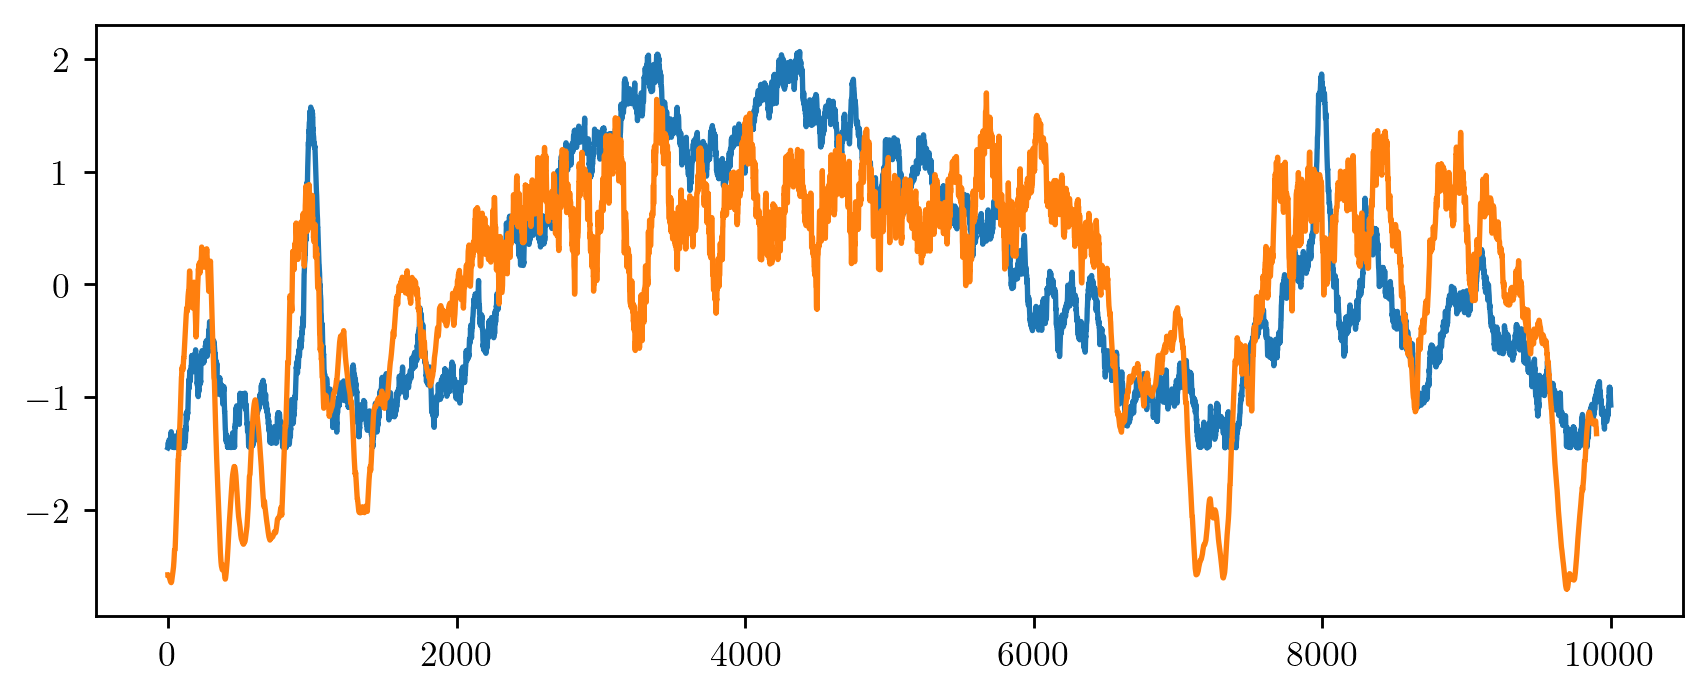

In [134]:



fig, ax = plt.subplots()
fig.set_size_inches(8, 3)

N = 100

x = demand_amounts[0]

ax.plot((x-np.mean(x))/np.std(x))

x = np.sum(rewards[0], axis=-1)
x = np.mean(x, axis=0)
x = np.convolve(x, np.ones(N)/N, mode='valid')

ax.plot((x-np.mean(x))/np.std(x))

fig.show()

/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:278: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


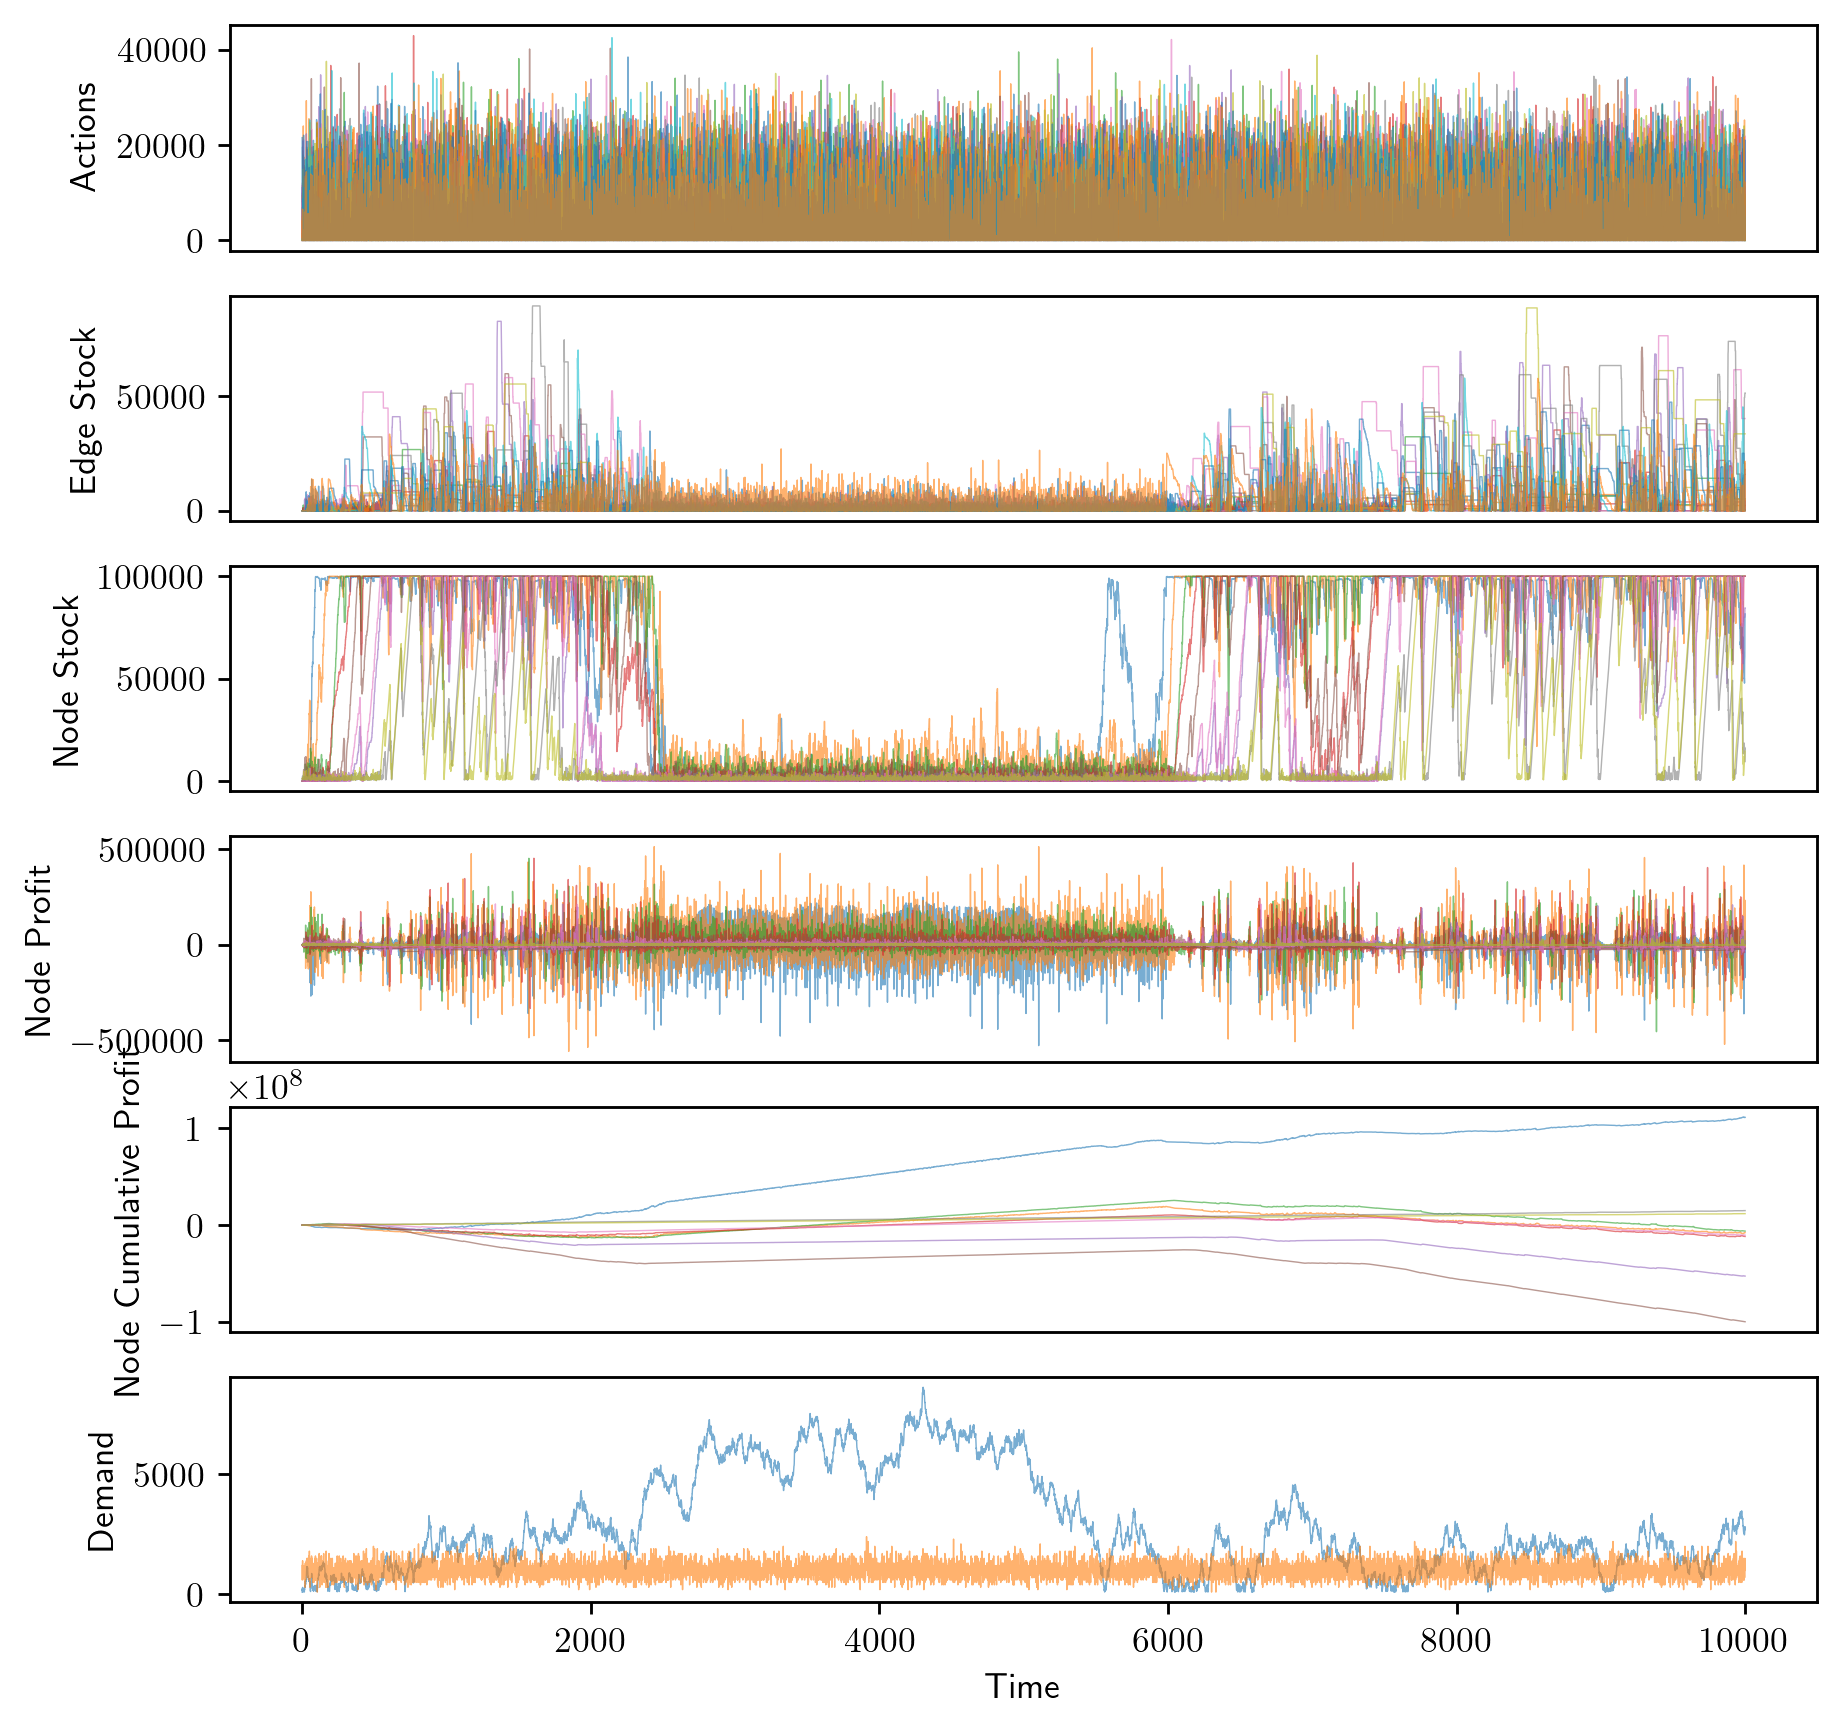

In [102]:
env.plot_history()

/Users/max/Documents/PeakAI/rl4sc/envs_copy.py:369: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


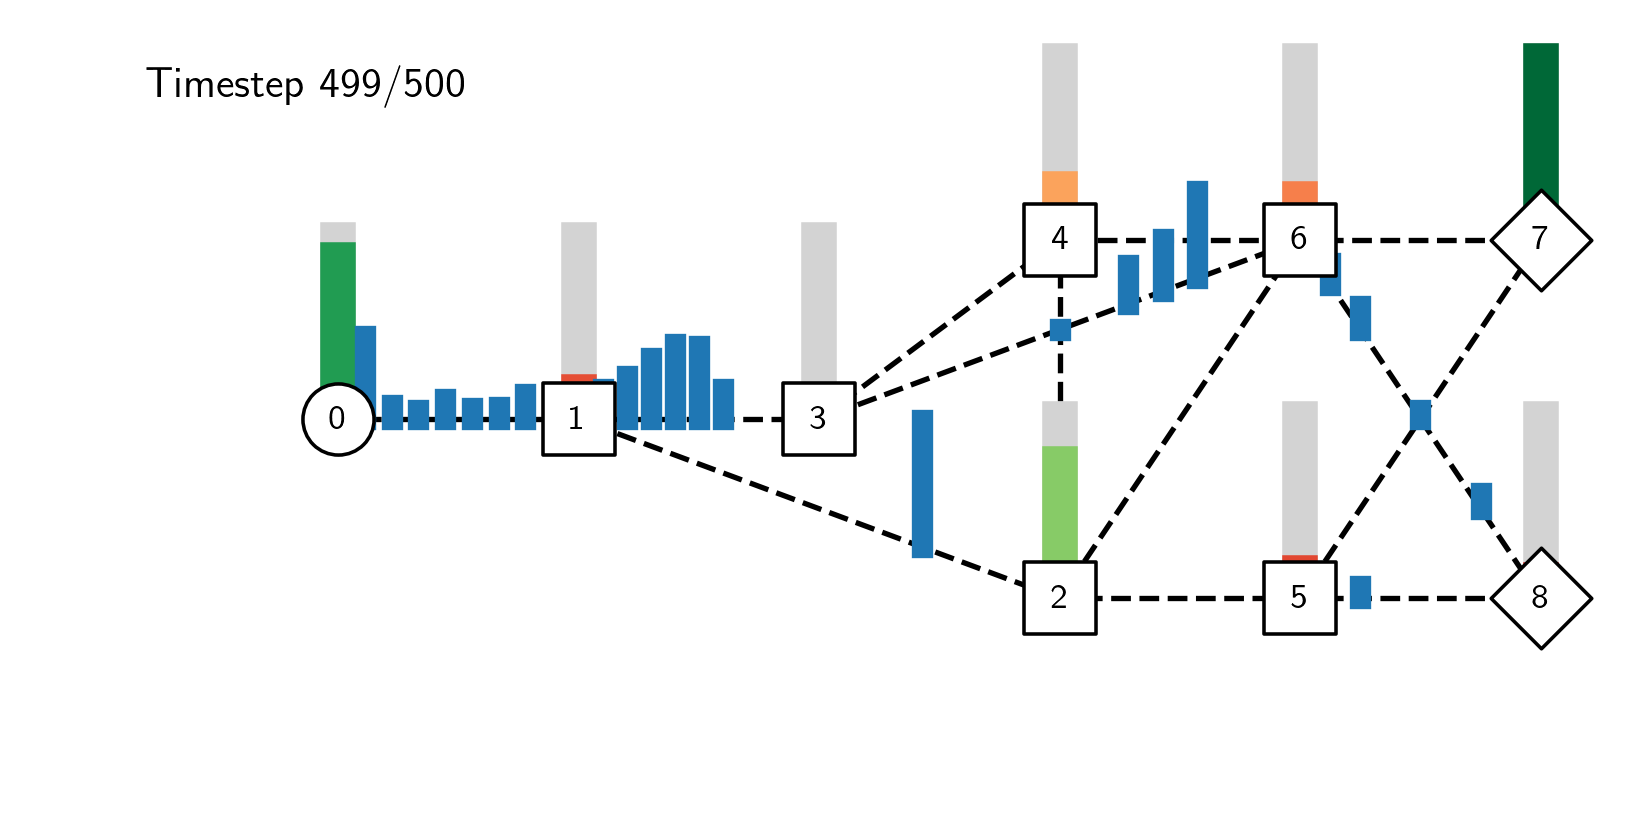

In [ ]:
env.animate_history(0, 500, 'supplychains/test/0_500_vec.gif')